<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Laboratorio Clase 02: Regresión Lineal

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__:

__Rol__:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

## Ejercicio 1: Diabetes

Realizar análisis de regresión a los datos de diabetes disponibles en scikit-learn

In [2]:
diabetes = datasets.load_diabetes()
print(dir(diabetes))  ## Atributos

['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
diabetes_df = (
    pd.DataFrame(
        diabetes.data,
        columns=diabetes.feature_names
    )
    .assign(prog=diabetes.target)
)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


#### Pregunta 1 (1 pto):

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?

* La columna sexo tiene esos valores dado que en base al promedio, se estandariza como promedio 0  para el valor original y de longitud al cuadrado = 1, esto es (sum(x^2)=1)
* La columna a predecir es la edad a la que es mas frecuente la diabetes dado el sexo

#### Pregunta 2 (1 pto)

Realiza una regresión lineal con todas las _features_ incluyendo intercepto.

In [73]:
X = diabetes_df.drop(columns=['sex','bmi','bp','s1','s2','s3','s4','s5','s6','prog']).values
Y = diabetes_df.drop(columns= ['age','bmi','bp','s1','s2','s3','s4','s5','s6','prog']).values

Ajusta el modelo

In [74]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True)
reg.fit(X, Y)
theta_sklearn = reg.coef_.T
print(theta_sklearn)

[[0.1737371]]


Imprime el intercepto y los coeficientes luego de ajustar el modelo.

In [75]:
print(f"Intercept:\n {theta_sklearn}\n")
print(f"Coefficients: \n {X,Y}\n")

Intercept:
 [[0.1737371]]

Coefficients: 
 (array([[ 0.03807591],
       [-0.00188202],
       [ 0.08529891],
       [-0.08906294],
       [ 0.00538306],
       [-0.09269548],
       [-0.04547248],
       [ 0.06350368],
       [ 0.04170844],
       [-0.07090025],
       [-0.09632802],
       [ 0.02717829],
       [ 0.01628068],
       [ 0.00538306],
       [ 0.04534098],
       [-0.05273755],
       [-0.00551455],
       [ 0.07076875],
       [-0.0382074 ],
       [-0.02730979],
       [-0.04910502],
       [-0.0854304 ],
       [-0.0854304 ],
       [ 0.04534098],
       [-0.06363517],
       [-0.06726771],
       [-0.10722563],
       [-0.02367725],
       [ 0.05260606],
       [ 0.06713621],
       [-0.06000263],
       [-0.02367725],
       [ 0.03444337],
       [ 0.03081083],
       [ 0.01628068],
       [ 0.04897352],
       [ 0.01264814],
       [-0.00914709],
       [-0.00188202],
       [-0.00188202],
       [ 0.00538306],
       [-0.09996055],
       [-0.06000263],
       [ 0

Haz una predicción del modelo con los datos `X`.

In [42]:
y_pred = 

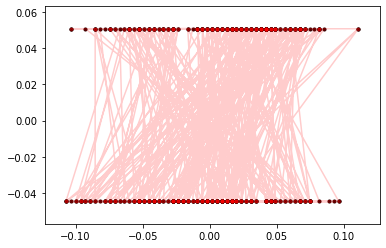

In [90]:
plt.scatter(X,Y, color = 'black', marker = '.',alpha=1)
plt.plot(X,Y, color = 'red',alpha=0.2,marker ='.')

Calcula e imprime el error cuadrático medio y el coeficiente de determinación de este modelo ajustado.

In [ ]:
# Error cuadrático medio
print(f"Mean squared error: {## FIX ME PLEASE ##:.2f}\n")

# Coeficiente de determinación
print(f"Coefficient of determination: {## FIX ME PLEASE ##:.2f}")

**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

**---TU RESPUESTA VA AQUÍ--**

### Pregunta 3 (2 ptos).

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [ ]:
for i in range(X.shape[1]):
    X_i = X[:, np.newaxis, i]  # Protip! Trata de entender este paso por tu cuenta, es muy clever
    regr_i = ## FIX ME PLEASE ##
    regr_i.## FIX ME PLEASE ##
    y_pred_i = ## FIX ME PLEASE ##
    print(f"{diabetes_df.columns[i]}:")
    print(f"\tCoefficients: {## FIX ME PLEASE ##}")
    print(f"\tIntercept: {## FIX ME PLEASE ##}")
    print(f"\tMean squared error: {## FIX ME PLEASE ##:.2f}")
    print(f"\tCoefficient of determination: {## FIX ME PLEASE ##:.2f}\n")

**Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

**---TU RESPUESTA VA AQUÍ--**

Con la feature escogida haz el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefiera.

In [ ]:
## FIX ME PLEASE ##